In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)

In [2]:
rleads = pd.read_csv("Bank Leads Cleaned v2 20240119.csv")

In [3]:
rleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               68797 non-null  object 
 1   DOB                                  68797 non-null  object 
 2   Lead_Creation_Date                   68797 non-null  object 
 3   City_Code                            68797 non-null  object 
 4   City_Category                        68797 non-null  object 
 5   Employer_Category1                   68797 non-null  object 
 6   Employer_Category2                   68797 non-null  float64
 7   Monthly_Income                       68797 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  68797 non-null  object 
 9   Primary_Bank_Type                    68797 non-null  object 
 10  Contacted                            68797 non-null  object 
 11  Source                      

## Drop features

In [4]:
sleads = rleads.drop(["Lead_Creation_Date", "DOB", "City_Code", "Customer_Existing_Primary_Bank_Code", "Source", "DOB_Year", "Lead_Creation_Month", "Lead_Creation_Day", "Lead_Creation_Day_of_Week"], axis=1)

In [5]:
sleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              68797 non-null  object 
 1   City_Category       68797 non-null  object 
 2   Employer_Category1  68797 non-null  object 
 3   Employer_Category2  68797 non-null  float64
 4   Monthly_Income      68797 non-null  float64
 5   Primary_Bank_Type   68797 non-null  object 
 6   Contacted           68797 non-null  object 
 7   Source_Category     68797 non-null  object 
 8   Existing_EMI        68797 non-null  float64
 9   Loan_Amount         68797 non-null  float64
 10  Loan_Period         68797 non-null  float64
 11  Interest_Rate       68797 non-null  float64
 12  EMI                 68797 non-null  float64
 13  Var1                68797 non-null  int64  
 14  Approved            68797 non-null  int64  
 15  Age                 68797 non-null  int64  
dtypes: f

In [6]:
def show_uniques(data):
    uniques = [data[col].nunique() for col in sleads.columns]
    feat = sleads.columns 
    table = pd.DataFrame({
                        "Feature": feat,
                        "Uniques": uniques
    })
    return table
    
show_uniques(sleads)

,Feature,Uniques
0,Gender,2
1,City_Category,3
2,Employer_Category1,3
3,Employer_Category2,4
4,Monthly_Income,4902
5,Primary_Bank_Type,2
6,Contacted,2
7,Source_Category,7
8,Existing_EMI,3189
9,Loan_Amount,195


## Encode categorical features

In [7]:
X_numeric = sleads[['Monthly_Income', 'Existing_EMI', 'Loan_Amount', 'Loan_Period', 'Interest_Rate', 'EMI', 'Age']]
X_categorical = sleads[['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Primary_Bank_Type', 'Contacted', 'Source_Category', 'Var1']]

In [8]:

X_cats = ['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Primary_Bank_Type', 'Contacted', 'Source_Category', 'Var1']
tleads = pd.get_dummies(sleads, prefix_sep="_", columns=X_cats, drop_first=True, dtype=int)

In [9]:
tleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68797 entries, 0 to 68796
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Monthly_Income          68797 non-null  float64
 1   Existing_EMI            68797 non-null  float64
 2   Loan_Amount             68797 non-null  float64
 3   Loan_Period             68797 non-null  float64
 4   Interest_Rate           68797 non-null  float64
 5   EMI                     68797 non-null  float64
 6   Approved                68797 non-null  int64  
 7   Age                     68797 non-null  int64  
 8   Gender_Male             68797 non-null  int32  
 9   City_Category_B         68797 non-null  int32  
 10  City_Category_C         68797 non-null  int32  
 11  Employer_Category1_B    68797 non-null  int32  
 12  Employer_Category1_C    68797 non-null  int32  
 13  Employer_Category2_2.0  68797 non-null  int32  
 14  Employer_Category2_3.0  68797 non-null

In [10]:
X = tleads.drop("Approved", axis=1)
y = tleads['Approved']

## Check for multicollinearity 

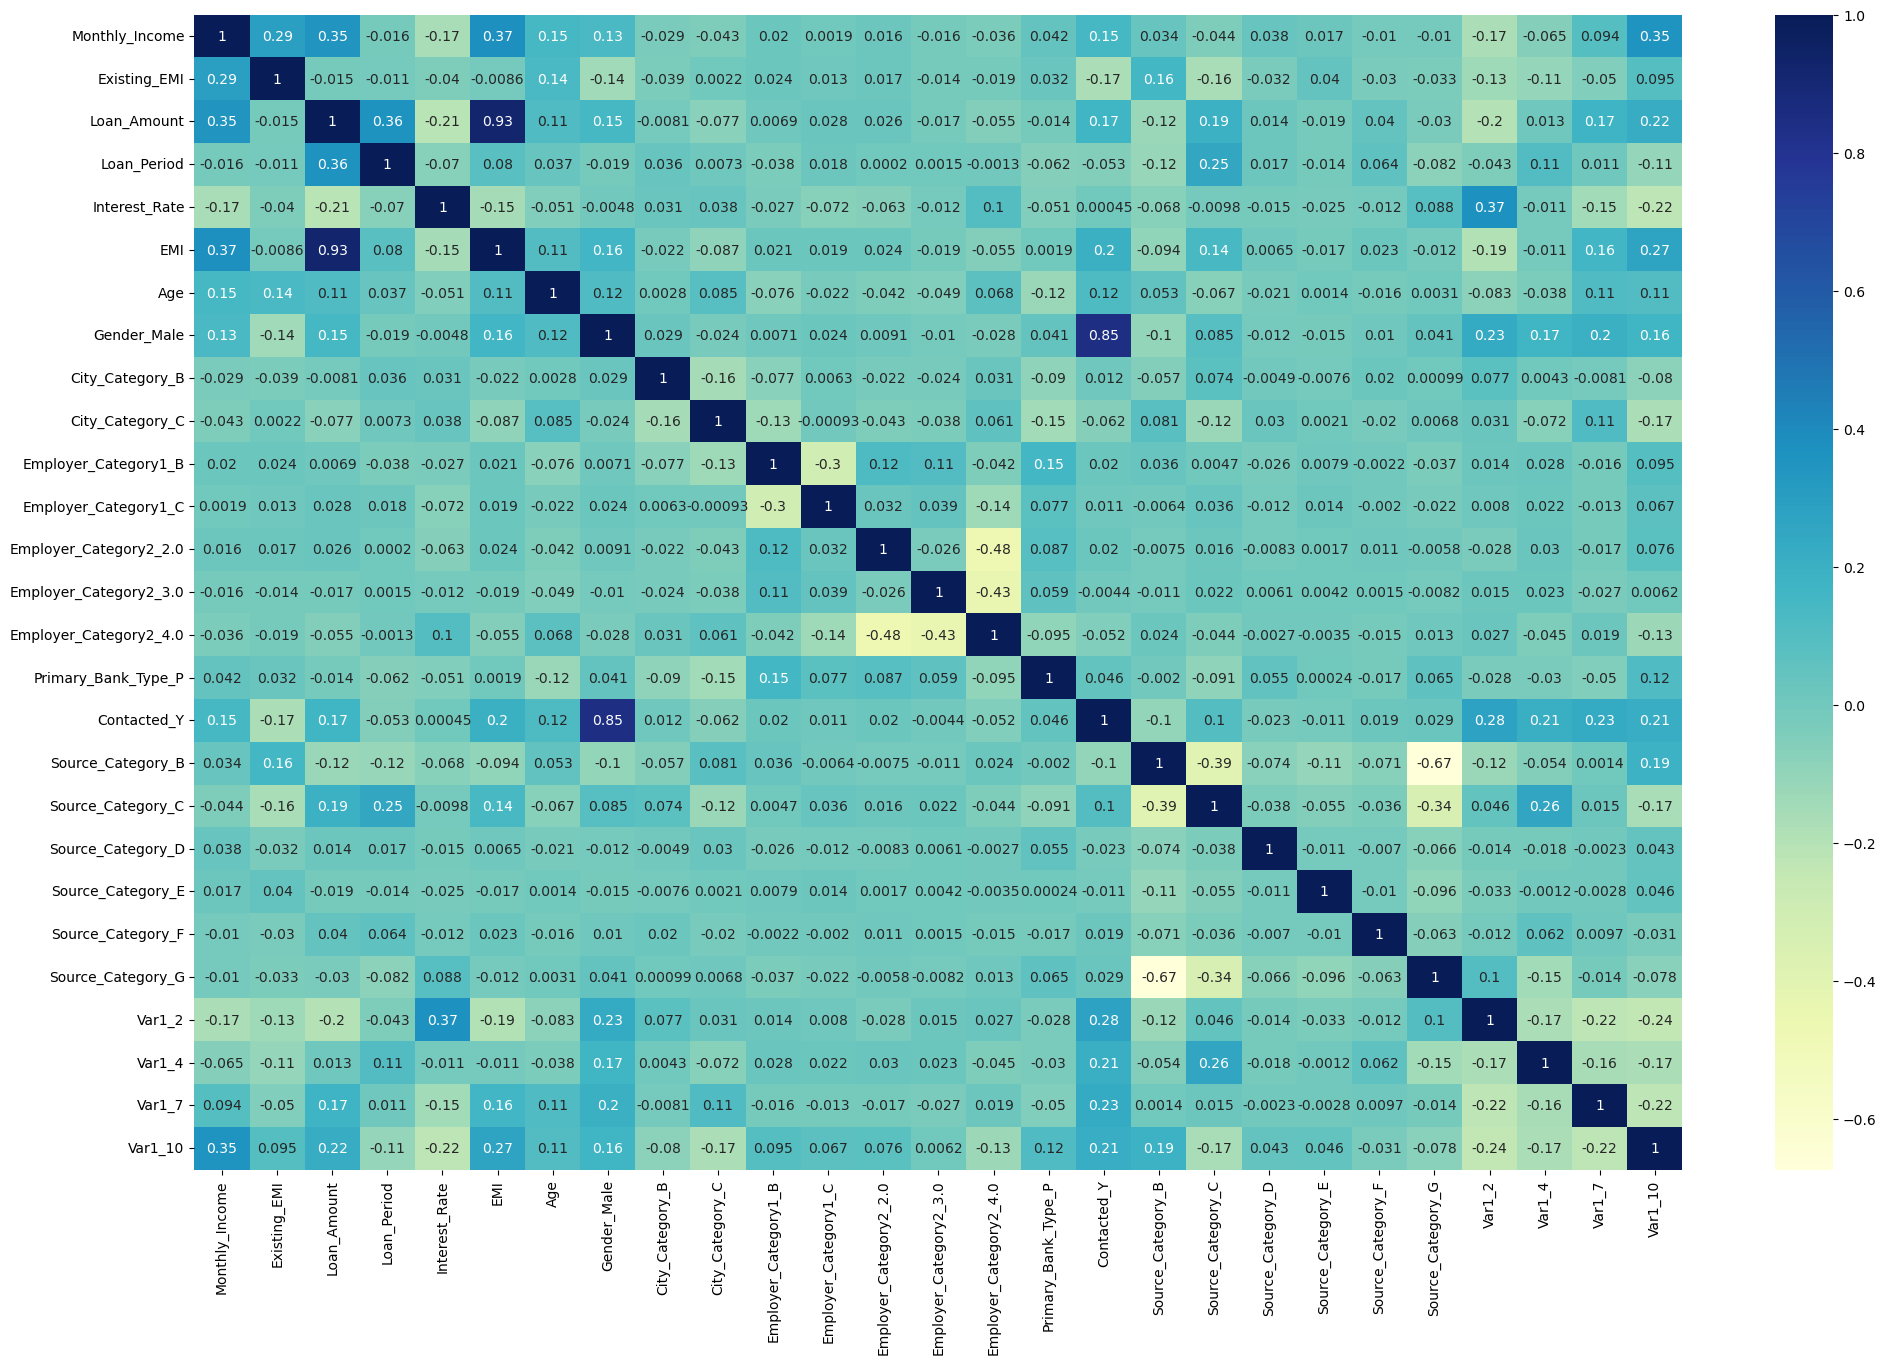

In [11]:
plt.figure(figsize=(24, 15))
corr_plot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [12]:
def check_vif(X):
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [13]:
check_vif(X)

,Variables,VIF
0,Monthly_Income,2.257436
1,Existing_EMI,1.400557
2,Loan_Amount,57.126499
3,Loan_Period,51.123576
4,Interest_Rate,44.523081
5,EMI,56.279264
6,Age,34.512767
7,Gender_Male,8.615143
8,City_Category_B,1.193057
9,City_Category_C,1.395196


### Due to multicollinearity, we need to engineer the features

In [14]:
# We can combine Loan Amount, Loan Period and Interest Rate

In [15]:
# Total loan repayment = P(1 + i)^n

In [16]:
def total_loan_calc(data):
    # Assuming 'Interest_Rate' is in percentage and needs to be converted to a fraction
    total_repayment = data['Loan_Amount'] * (1 + data['Interest_Rate']/100)**data['Loan_Period']
    return total_repayment

# Applying the function to the DataFrame
tleads['Total_Loan'] = total_loan_calc(tleads[['Loan_Amount', 'Interest_Rate', 'Loan_Period']])
tleads.head()

,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Approved,Age,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Employer_Category2_2.0,Employer_Category2_3.0,Employer_Category2_4.0,Primary_Bank_Type_P,Contacted_Y,Source_Category_B,Source_Category_C,Source_Category_D,Source_Category_E,Source_Category_F,Source_Category_G,Var1_2,Var1_4,Var1_7,Var1_10,Total_Loan
0,2000.0,0.0,30000.0,4.0,19.21357,900.387994,0,45,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,60593.219140
1,3500.0,0.0,20000.0,2.0,13.25000,953.000000,0,38,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,25651.125000
2,2250.0,0.0,45000.0,4.0,19.21357,1350.581991,0,42,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,90889.828710
3,3500.0,0.0,92000.0,5.0,19.21357,2397.355046,0,35,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,221521.708014
4,10000.0,2500.0,50000.0,2.0,19.21357,2525.622064,0,39,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,71059.376076


In [17]:
tleads.drop(["Loan_Amount", "Loan_Period", "Interest_Rate"], axis=1, inplace=True)

In [18]:
check_vif(X)

,Variables,VIF
0,Monthly_Income,2.257436
1,Existing_EMI,1.400557
2,Loan_Amount,57.126499
3,Loan_Period,51.123576
4,Interest_Rate,44.523081
5,EMI,56.279264
6,Age,34.512767
7,Gender_Male,8.615143
8,City_Category_B,1.193057
9,City_Category_C,1.395196


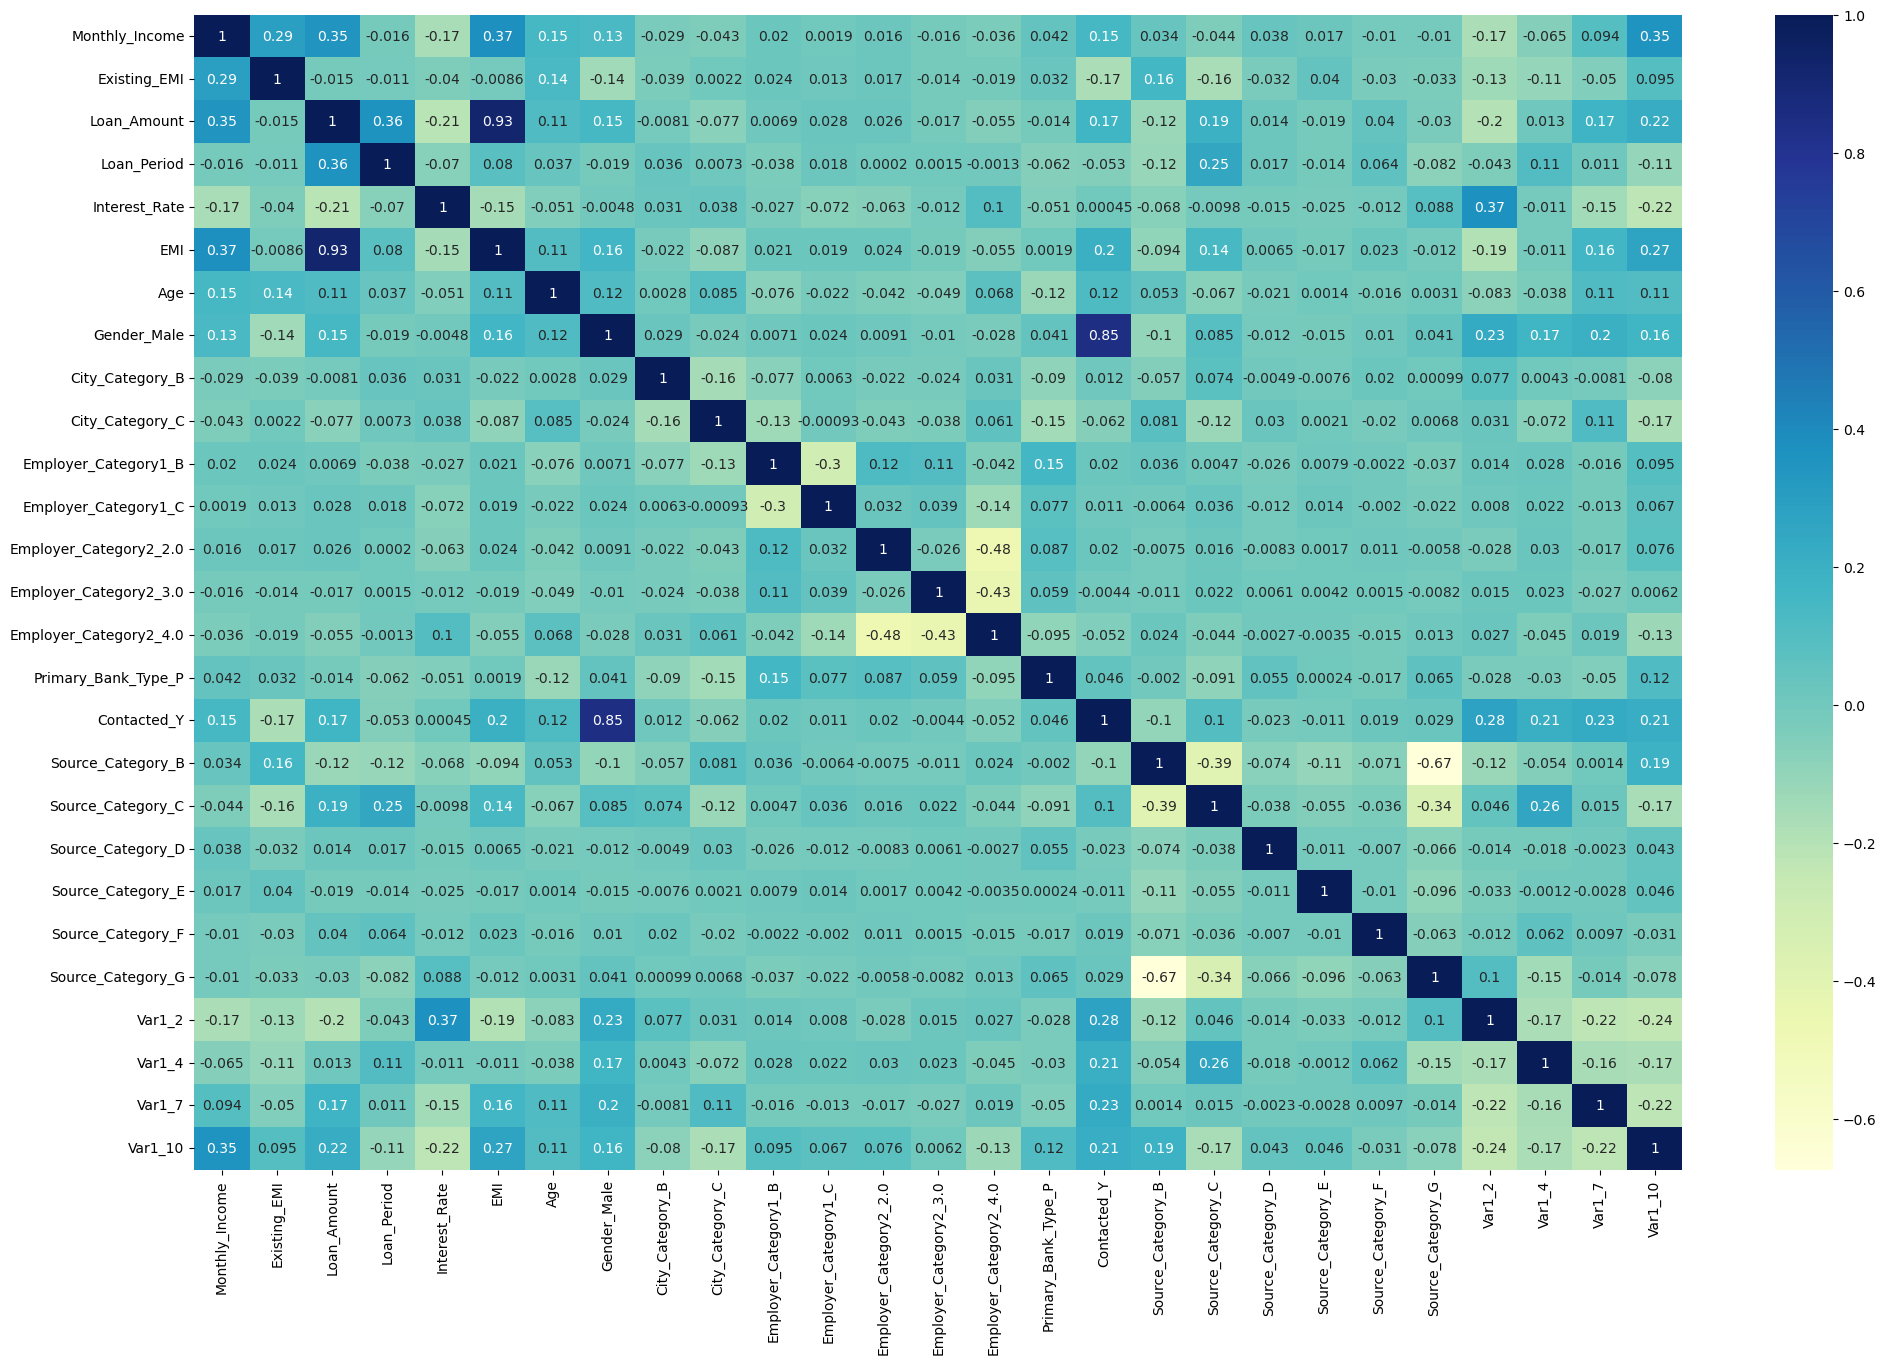

In [19]:
plt.figure(figsize=(24, 15))
corr_plot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [20]:
tleads.drop(["EMI", "Source_Category_B", "Source_Category_C", "Source_Category_D", "Source_Category_E", "Source_Category_F", "Source_Category_G"], axis=1, inplace=True)

In [21]:
tleads.head()

,Monthly_Income,Existing_EMI,Approved,Age,Gender_Male,City_Category_B,City_Category_C,Employer_Category1_B,Employer_Category1_C,Employer_Category2_2.0,Employer_Category2_3.0,Employer_Category2_4.0,Primary_Bank_Type_P,Contacted_Y,Var1_2,Var1_4,Var1_7,Var1_10,Total_Loan
0,2000.0,0.0,0,45,0,0,0,0,0,0,0,1,1,0,0,0,0,0,60593.219140
1,3500.0,0.0,0,38,1,0,0,0,1,0,0,0,1,1,0,0,0,1,25651.125000
2,2250.0,0.0,0,42,1,0,1,0,1,0,0,1,0,1,0,0,0,0,90889.828710
3,3500.0,0.0,0,35,1,0,1,0,0,0,0,1,0,1,0,0,1,0,221521.708014
4,10000.0,2500.0,0,39,1,0,0,0,0,0,0,1,1,1,0,0,0,1,71059.376076


In [22]:
X = tleads.drop("Approved", axis=1)
y = tleads['Approved']

In [23]:
check_vif(X)

,Variables,VIF
0,Monthly_Income,2.171613
1,Existing_EMI,1.360107
2,Age,16.477530
3,Gender_Male,8.574222
4,City_Category_B,1.184345
5,City_Category_C,1.356481
6,Employer_Category1_B,1.671463
7,Employer_Category1_C,1.450993
8,Employer_Category2_2.0,1.365924
9,Employer_Category2_3.0,1.303125


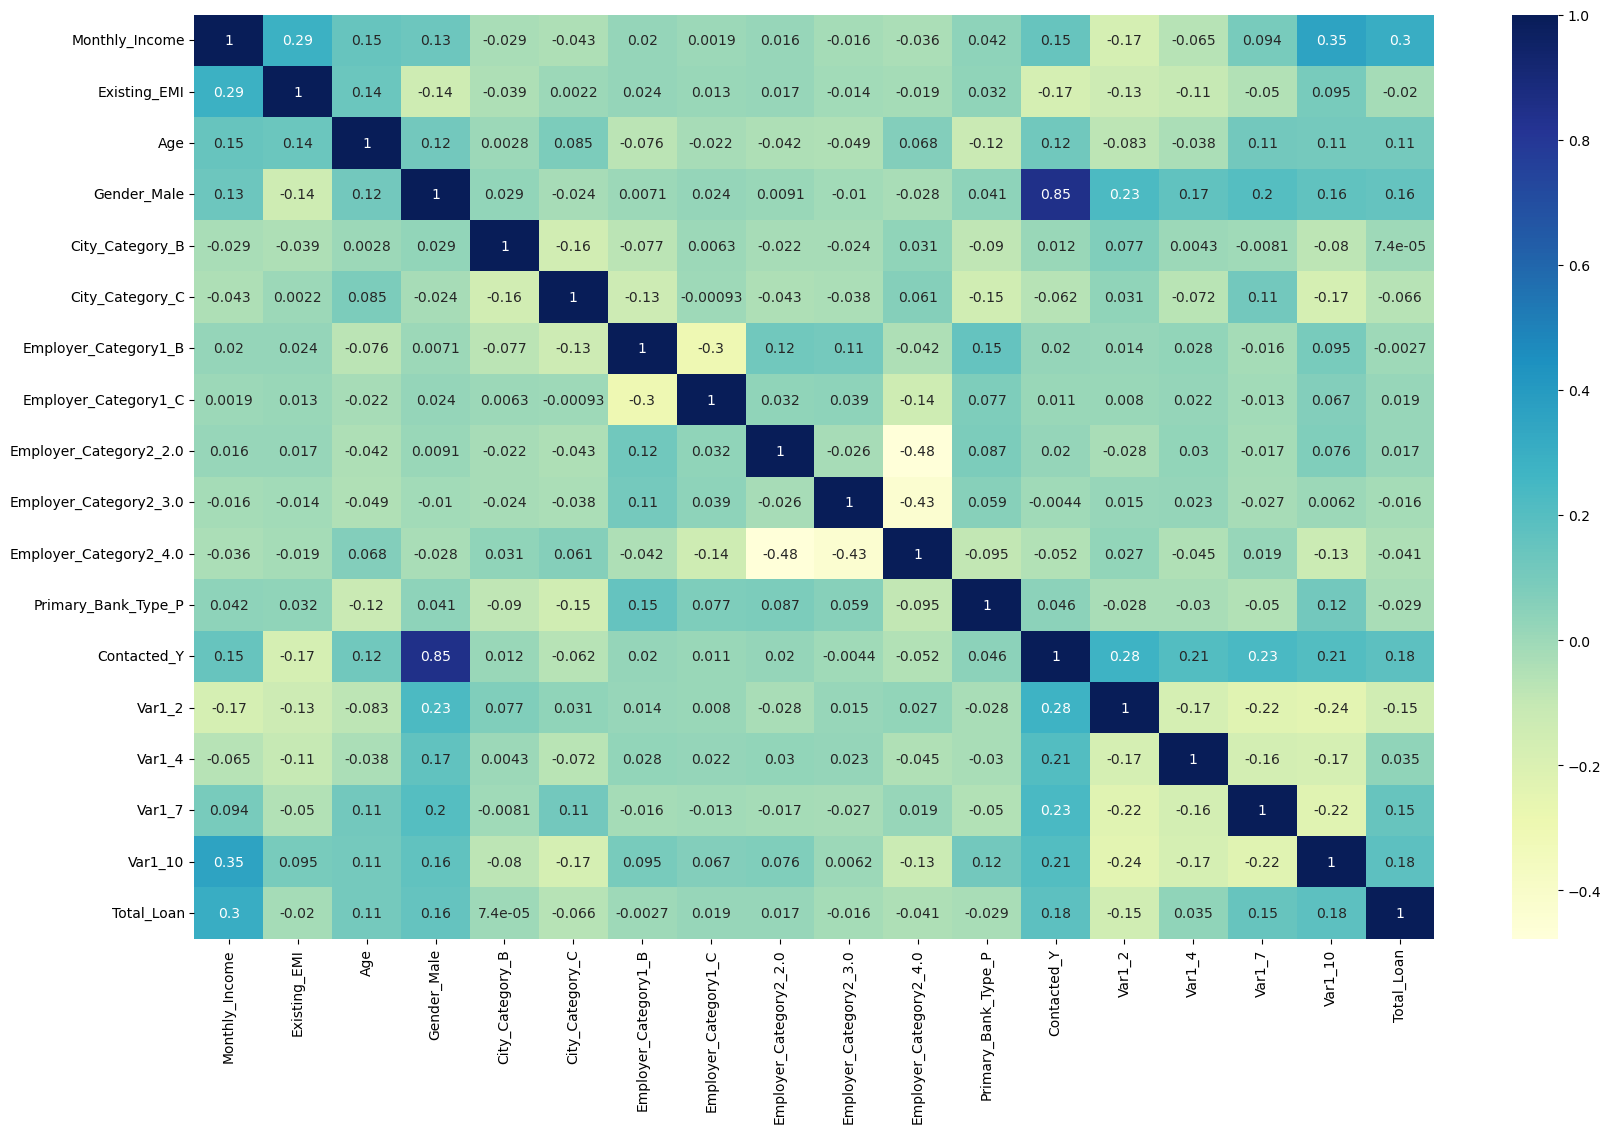

In [24]:
plt.figure(figsize=(20, 12))
corr_plot = sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)

In [25]:
tleads.drop(["Contacted_Y"], axis=1, inplace=True)

## Scale the numeric features

In [26]:
X = tleads.drop("Approved", axis=1)
y = tleads['Approved']

X_numeric = tleads[['Monthly_Income', 'Existing_EMI', 'Total_Loan', 'Age']]
# X_categorical = tleads[['Gender', 'City_Category', 'Employer_Category1', 'Employer_Category2', 'Primary_Bank_Type', 'Contacted', 'Var1']]

In [27]:
X_numeric

,Monthly_Income,Existing_EMI,Total_Loan,Age
0,2000.0,0.0,60593.219140,45
1,3500.0,0.0,25651.125000,38
2,2250.0,0.0,90889.828710,42
3,3500.0,0.0,221521.708014,35
4,10000.0,2500.0,71059.376076,39
...,...,...,...,...
68792,4900.0,0.0,60593.219140,41
68793,7190.1,1450.0,60593.219140,53
68794,1600.0,0.0,80903.707215,32
68795,9893.0,1366.0,192627.572186,46


In [28]:
rs = RobustScaler()
scaled_X_numeric = rs.fit_transform(X_numeric)

scaled_X_numeric_df = pd.DataFrame(scaled_X_numeric, columns=['Monthly_Income', 'Existing_EMI', 'Total_Loan', 'Age'])

tleads.drop(['Monthly_Income', 'Existing_EMI', 'Total_Loan', 'Age'], axis=1, inplace=True)

uleads = pd.concat([tleads, scaled_X_numeric_df], axis=1)

In [29]:
uleads.describe().T

,count,mean,std,min,25%,50%,75%,max
Approved,68797.0,0.014754,0.120566,0.000000,0.000000,0.0,0.000000,1.000000
Gender_Male,68797.0,0.579211,0.493689,0.000000,0.000000,1.0,1.000000,1.000000
City_Category_B,68797.0,0.106342,0.308277,0.000000,0.000000,0.0,0.000000,1.000000
City_Category_C,68797.0,0.169789,0.375450,0.000000,0.000000,0.0,0.000000,1.000000
Employer_Category1_B,68797.0,0.260622,0.438977,0.000000,0.000000,0.0,1.000000,1.000000
Employer_Category1_C,68797.0,0.206637,0.404896,0.000000,0.000000,0.0,0.000000,1.000000
Employer_Category2_2.0,68797.0,0.028199,0.165542,0.000000,0.000000,0.0,0.000000,1.000000
Employer_Category2_3.0,68797.0,0.023460,0.151361,0.000000,0.000000,0.0,0.000000,1.000000
Employer_Category2_4.0,68797.0,0.886943,0.316665,0.000000,1.000000,1.0,1.000000,1.000000
Primary_Bank_Type_P,68797.0,0.700074,0.458229,0.000000,0.000000,1.0,1.000000,1.000000


In [45]:
X = uleads.drop("Approved", axis=1)
y = uleads['Approved']

## Logistic Regression

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [47]:
lr = LogisticRegression(solver='newton-cholesky')

In [48]:
lr.fit(X_train, y_train)

LogisticRegression(solver='newton-cholesky')

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20335
           1       0.00      0.00      0.00       305

    accuracy                           0.99     20640
   macro avg       0.49      0.50      0.50     20640
weighted avg       0.97      0.99      0.98     20640



C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\zive9\anaconda3\envs\iod\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


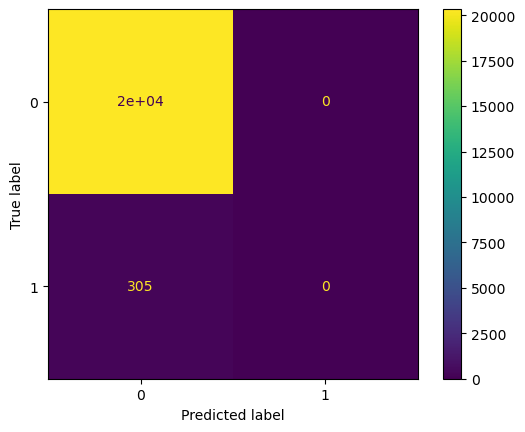

In [49]:
lr_y_preds = lr.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, lr_y_preds))

conf_matrix = confusion_matrix(y_test, lr_y_preds)

cf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=None)
cf_display.plot()
plt.show()

## MLP Classification

In [51]:
X = uleads.drop("Approved", axis=1)
y = uleads['Approved']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [69]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(180,90,90))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(180, 90, 90))

In [70]:
predictions = mlp.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[20110   225]
 [  293    12]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.45      0.62     20335
           1       0.02      0.87      0.04       305

    accuracy                           0.45     20640
   macro avg       0.51      0.66      0.33     20640
weighted avg       0.98      0.45      0.61     20640



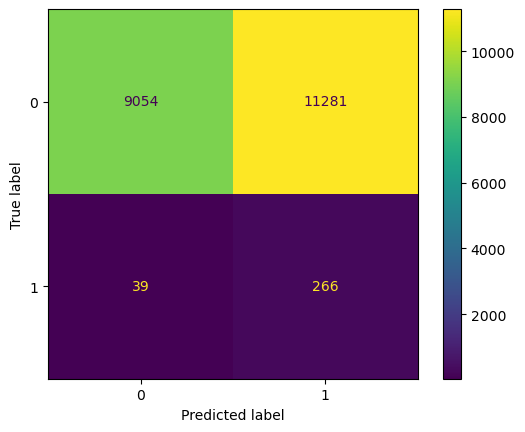

In [72]:
# mlp_y_preds = mlp.predict(X_test)

# Set threshold 
mlp_y_preds = (mlp.predict_proba(X_test)[:,1] >= 0.00000000000001).astype(bool) 

print("Classification Report:")
print(classification_report(y_test, mlp_y_preds))

conf_matrix = confusion_matrix(y_test, mlp_y_preds)

cf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=None)
cf_display.plot()
plt.show()